In [59]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [102]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as py
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import plot_plotly 
import plotly.graph_objects as go
import nbformat as nb
from sklearn.metrics import mean_squared_error




# Especifica la ruta del archivo .xlsx que deseas leer
precios = 'C:/Users/tomas/Documents/U/DS/spy.csv'

# Utiliza la función read_excel de pandas para cargar el archivo en un DataFrame
df_precios = pd.read_csv(precios)

print(df_precios.head())

         Date       Open       High        Low      Close   Volume  Day  \
0  1993-01-29  25.047169  25.047169  24.922556  25.029367  1003200   29   
1  1993-02-01  25.047171  25.207388  25.047171  25.207388   480500    1   
2  1993-02-02  25.189590  25.278599  25.136185  25.260798   201300    2   
3  1993-02-03  25.296384  25.545609  25.278582  25.527807   529400    3   
4  1993-02-04  25.616828  25.688036  25.331999  25.634630   531500    4   

   Weekday  Week  Month  Year  
0        4     4      1  1993  
1        0     5      2  1993  
2        1     5      2  1993  
3        2     5      2  1993  
4        3     5      2  1993  


In [104]:
dataframe_precios = df_precios.loc[:, ['Date', 'Close']]

dataframe_precios.columns = ['ds','y']
dataframe_precios['ds'] = pd.to_datetime(dataframe_precios['ds'])
dataframe_precios.tail()  ##La serie original tiene 7678 datos


7679


<Axes: xlabel='ds'>

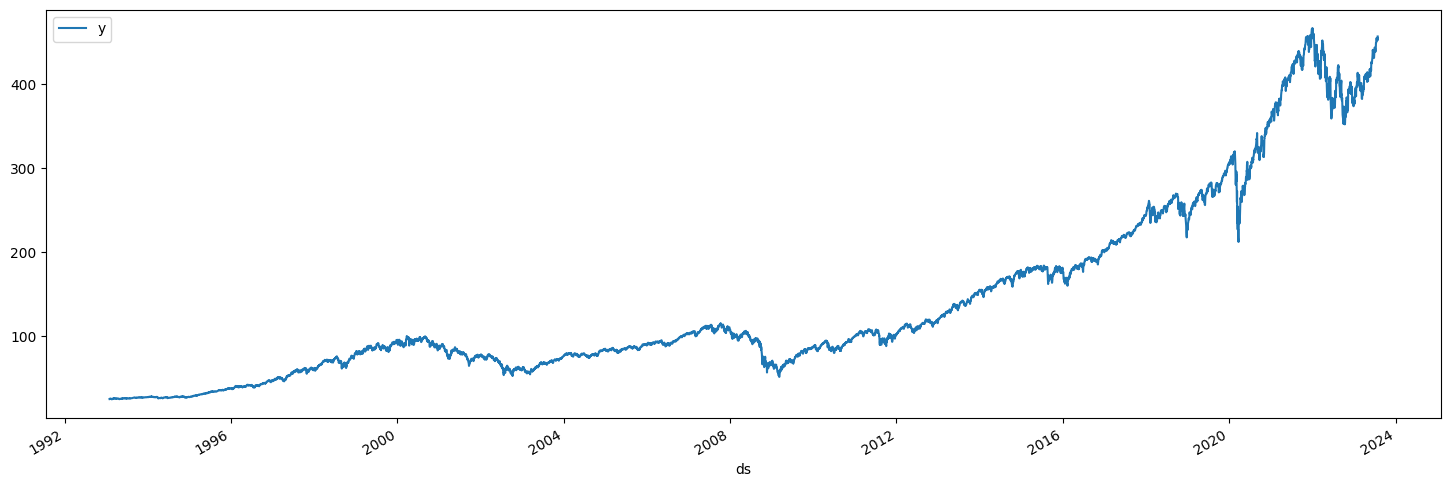

In [92]:
dataframe_precios.plot(x='ds',y='y',figsize=(18,6)) ##Mostramos el gráfico de la serie

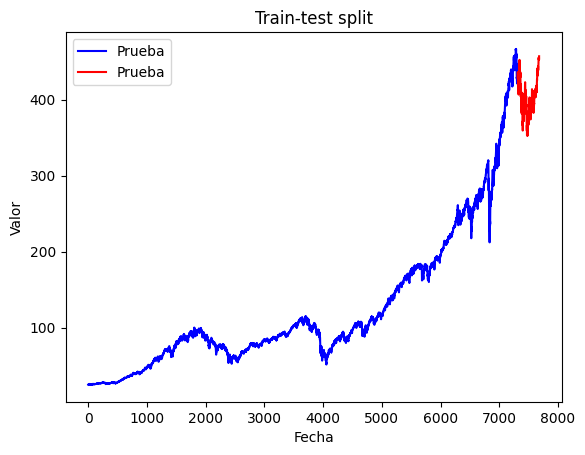

,ds,y
0,1993-01-29,25.029367
1,1993-02-01,25.207388
2,1993-02-02,25.260798
3,1993-02-03,25.527807
4,1993-02-04,25.634630


In [178]:
train = dataframe_precios .iloc[:largo-365] #El conjunto de entrenamiento tiene 7679-365=7314 datos
test = dataframe_precios.iloc[largo-365:]  #El conjunto de prueba tiene 365 datos
py.plot(train['y'], label='Prueba', color='blue')
py.plot(test['y'], label='Prueba', color='red')
py.xlabel('Fecha')
py.ylabel('Valor')
py.title('Train-test split')
py.legend()  # Mostrar leyendas

#Mostrar la gráfica
py.show()

train.head()


In [232]:
m = Prophet(    daily_seasonality=True,    # Desactivar estacionalidad diaria
    weekly_seasonality=True,    # Activar estacionalidad semanal
    yearly_seasonality=True,    # Activar estacionalidad anual
    seasonality_mode= 'additive' ,   # Utilizar una estacionalidad multiplicativa
     # Ajustar la fuerza de la regularización
)
m.fit(train)
future = m.make_future_dataframe(periods=365) #Hacemos la predicción a un año
forecast = m.predict(future)
print( " Número de Datos ajustados y proyectados: " ,len(forecast))
numeroproy= len(forecast)
print(numeroproy)

12:43:02 - cmdstanpy - INFO - Chain [1] start processing
12:43:06 - cmdstanpy - INFO - Chain [1] done processing


 Número de Datos ajustados y proyectados:  7679
7679


365


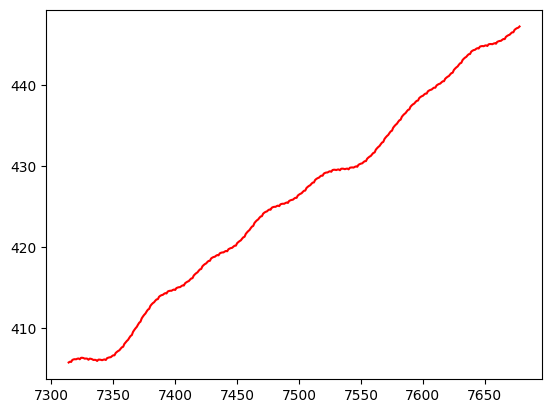

In [233]:

proyectados = forecast .iloc[largo-365:]
print(len(proyectados))
proyectados[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
py.plot(proyectados['yhat'], label='Predicción', color='red')


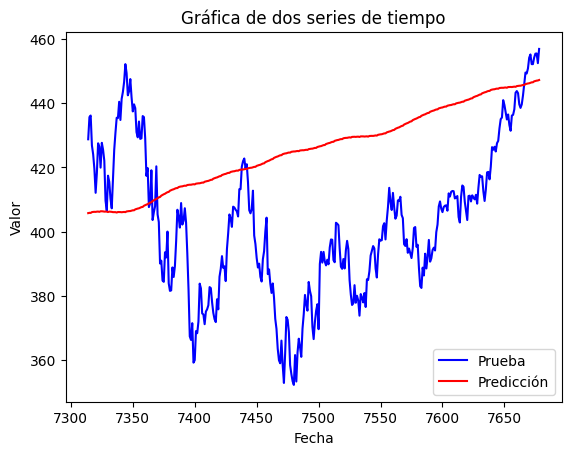

In [234]:
# Graficar las series de tiempo
py.plot(test['y'], label='Prueba', color='blue')
py.plot(proyectados['yhat'], label='Predicción', color='red')

# Configurar etiquetas y título
py.xlabel('Fecha')
py.ylabel('Valor')
py.title('Gráfica de dos series de tiempo')
py.legend()  # Mostrar leyendas

##Mostrar la gráfica
py.show()

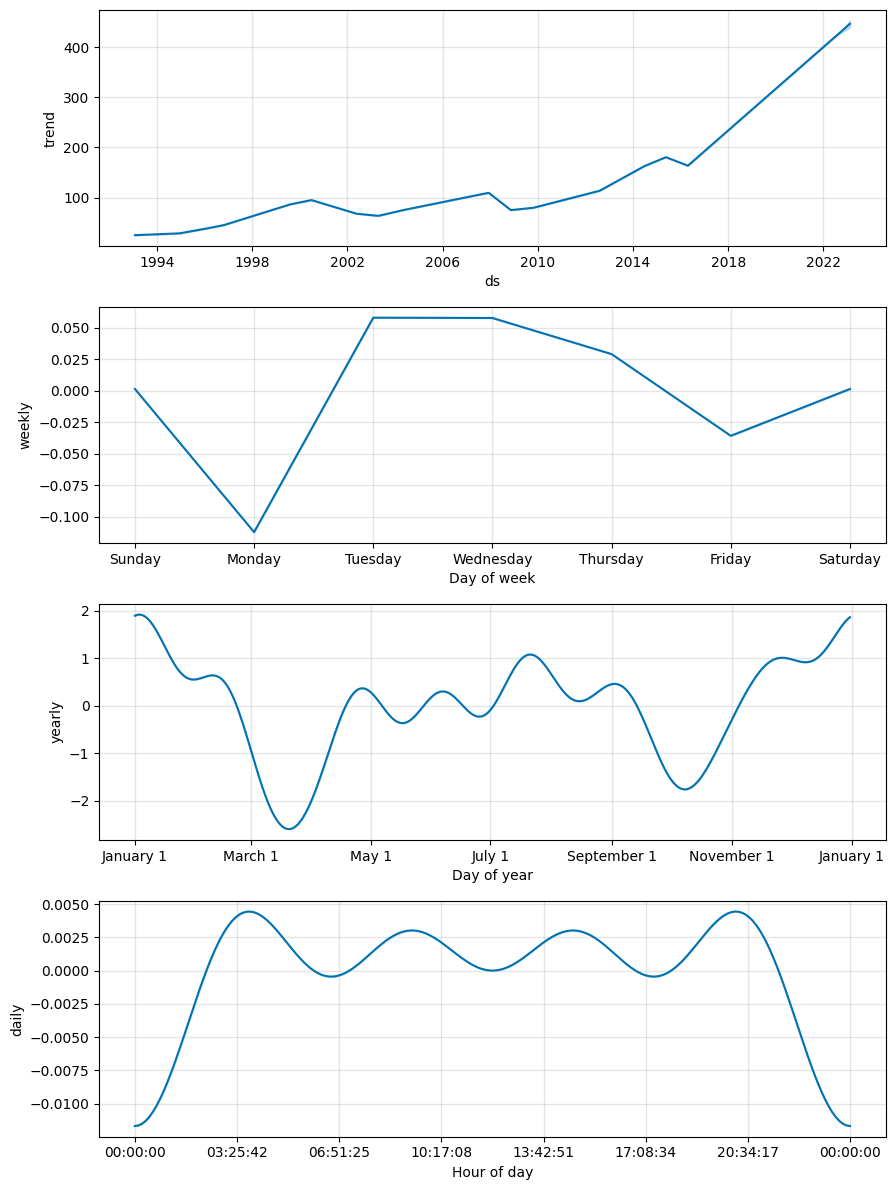

In [235]:
fig2 = m.plot_components(forecast)


In [148]:
type(proyectados) #nos aseguramos que sea un df


C:\Users\tomas\AppData\Local\Temp\ipykernel_29940\4237037259.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [236]:
# Crear los DataFrames
df_predicho = pd.DataFrame(proyectados)
df_real = pd.DataFrame(test)


predicho_time = df_predicho.set_index('ds')
real_time = df_real.set_index('ds')

predicho_time.tail()

## Unir los DataFrames utilizando merge y calcular la diferencia entre los valores
df_merged = pd.merge(predicho_time, real_time, left_index=True, right_index=True, suffixes=('_predicho', '_real'))
df_merged['Diferencia'] = df_merged['yhat'] - df_merged['y']
#
## Calcular el RMSE
rmse = np.sqrt(np.mean(df_merged['Diferencia'] ** 2))
#
print("RMSE:", rmse)
#


RMSE: 42.688450681405854
